# SVD for Image Compression

## Overview

Singular Value Decomposition (SVD) is a matrix factorization technique that decomposes a matrix $X$ (of size $m \times n$) into three matrices:

$$X = U \Sigma V^T$$

where:
- $U$ is an $m \times m$ orthogonal matrix (left singular vectors)
- $\Sigma$ is an $m \times n$ diagonal matrix (singular values)
- $V^T$ is an $n \times n$ orthogonal matrix (right singular vectors)

## How SVD Enables Compression

The key insight for compression is that the singular values in $\Sigma$ are ordered by magnitude, with the largest values appearing first. This ordering reflects the "importance" of each component in reconstructing the original matrix.

### Low-Rank Approximation

We can create a compressed version of $X$ by keeping only the first $r$ components:

$$\hat{X} = \hat{U} \hat{\Sigma} \hat{V}^T$$

where:
- $\hat{U}$ contains the first $r$ columns of $U$ (size $m \times r$)
- $\hat{\Sigma}$ contains the top-left $r \times r$ block of $\Sigma$
- $\hat{V}^T$ contains the first $r$ rows of $V^T$ (size $r \times n$)

This gives us a rank-$r$ approximation of the original matrix $X$, trading off accuracy for storage efficiency. The smaller the value of $r$, the greater the compression but the lower the reconstruction quality.

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.image import imread
import os

First, we read the image and transform it into grayscale. This image has 2.000 rows and 1.500 columns

In [12]:
A = imread("./data/dog.jpg")
X = A.mean(axis = -1)
print(X.shape)

(2000, 1500)


We take the SVD using the linalg module in numpy. The full_matrices parameter allow us to take the "economy" version of the SVD, that is, just m columns of U, as the rest are not necessary.

In [21]:
U, S, Vt = np.linalg.svd(X, full_matrices = False)
S = np.diag(S)

Now we reconstruc and plot the image using the rank r aproximation:

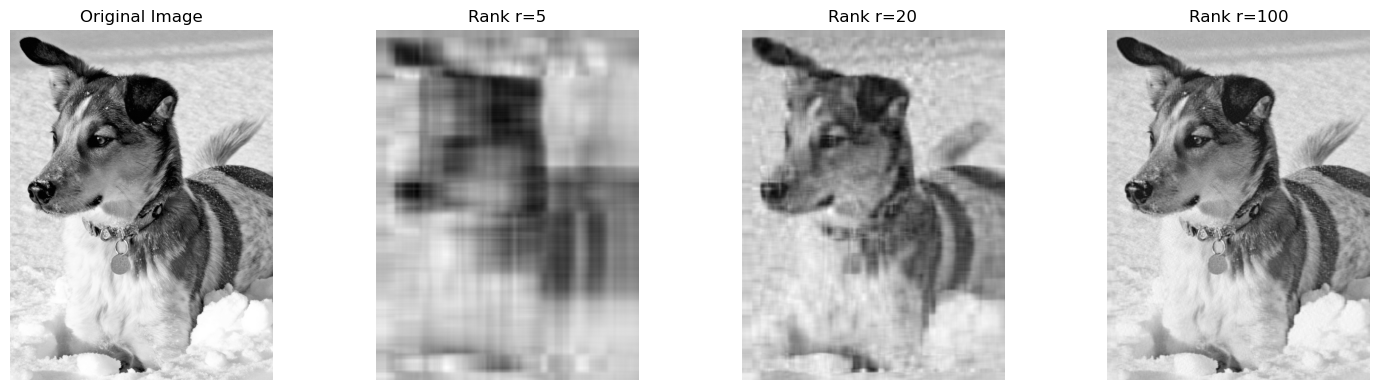

In [22]:
def reconstruct(r):
    return U[:, :r] @ S[:r, :r] @ Vt[:r, :]

ranks = [5, 20, 100]
fig, axes = plt.subplots(1, len(ranks) + 1, figsize=(15, 4))

axes[0].imshow(X, cmap='gray')
axes[0].set_title('Original Image')
axes[0].axis('off')

for idx, r in enumerate(ranks, start=1):
    Xaprox = reconstruct(r)
    axes[idx].imshow(Xaprox, cmap='gray')
    axes[idx].set_title(f'Rank r={r}')
    axes[idx].axis('off')

plt.tight_layout()
plt.show()